
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [ ]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

## Delft, Netherlands

In [ ]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 1 # 6 minutes hour of simulation
params.nP = 500 # reuqests (and passengers)
params.nV = 20 # vehicles



## Parameters for ExMAS

In [ ]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [142]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

30-03-23 12:46:49-INFO-Initializing pairwise trip shareability between 500 and 500 trips.
30-03-23 12:46:49-INFO-creating combinations
30-03-23 12:46:50-INFO-249500	 nR*(nR-1)
30-03-23 12:46:53-INFO-Reduction of feasible pairs by 99.29%
30-03-23 12:46:53-INFO-Degree 2 	Completed
30-03-23 12:46:53-INFO-trips to extend at degree 2 : 4276
30-03-23 12:46:58-INFO-At degree 2 feasible extensions found out of 1765 searched
30-03-23 12:46:58-INFO-Degree 3 	Completed
30-03-23 12:46:58-INFO-trips to extend at degree 3 : 1765
30-03-23 12:47:01-INFO-At degree 3 feasible extensions found out of 496 searched
30-03-23 12:47:01-INFO-Degree 4 	Completed
30-03-23 12:47:01-INFO-Max degree reached 4
30-03-23 12:47:01-INFO-Trips still possible to extend at degree 4 : 496


In [143]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

30-03-23 12:47:03-INFO-Matching 500 trips to 7037 rides in order to min u_veh
30-03-23 12:47:05-INFO-Problem solution: Optimal. 
Total costs for single trips:        131,066 
reduced by matching to:               90,175


In [144]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],6.686000,361,1,[6.686],"[0, 361]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44720722, 44759018]","[None, 0, 0]",node time req_id od 0 NaN...,361,3.61,5.422500,1.084500,4.3380
1,[1],6.239000,337,1,[6.239],"[3, 337]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1402771629, 612595747]","[None, 1, 1]",node time req_id od 0 ...,337,3.37,5.059500,1.011900,4.0476
2,[2],1.547500,83,1,[1.5474999999999999],"[6, 83]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 1413910902, 1517579041]","[None, 2, 2]",node time req_id od 0 ...,83,0.83,1.257000,0.251400,1.0056
3,[3],4.376500,236,1,[4.3765],"[9, 236]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44850248, 1393024898]","[None, 3, 3]",node time req_id od 0 ...,236,2.36,3.550500,0.710100,2.8404
4,[4],1.618500,87,1,[1.6185],"[17, 87]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 626009950, 44810823]","[None, 4, 4]",node time req_id od 0 N...,87,0.87,1.314000,0.262800,1.0512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032,"[185, 195, 188, 202]",27.599250,855,40,"[7.7372000000000005, 7.377525, 7.16245, 5.322075]","[1236.0, 124, 60, 297, 152, 17, 31, 174]","[185, 195, 188, 202]","[195, 185, 188, 202]",4,7032,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1566353921, 1830058806, 1519890027, 162...","[None, 185, 195, 188, 202, 195, 185, 188, 202]",node time req_id od 0 ...,855,8.55,17.088750,3.417750,13.6710
7033,"[195, 188, 198, 202]",26.037275,722,40,"[7.545875, 6.59825, 6.580175, 5.312975]","[1272.0, 60, 122, 178, 165, 33, 135, 29]","[195, 188, 198, 202]","[188, 195, 198, 202]",4,7033,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1830058806, 1519890027, 1448535880, 162...","[None, 195, 188, 198, 202, 188, 195, 198, 202]",node time req_id od 0 ...,722,7.22,16.491375,3.298275,13.1931
7034,"[195, 189, 188, 198]",27.499525,745,40,"[7.525399999999999, 6.16325, 7.119225, 6.69165]","[1273.5, 59, 9, 122, 261, 114, 32, 148]","[195, 189, 188, 198]","[189, 195, 188, 198]",4,7034,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1830058806, 1519889974, 1519890027, 144...","[None, 195, 189, 188, 198, 189, 195, 188, 198]",node time req_id od 0 ...,745,7.45,17.566875,3.513375,14.0535
7035,"[25, 45, 59, 78]",18.976700,819,42,"[10.337775, 4.719875, 1.4826000000000001, 2.43...","[124.5, 137, 49, 90, 9, 127, 99, 308]","[25, 45, 59, 78]","[59, 78, 45, 25]",4,7035,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1608998334, 1258471011, 1413910854, 260...","[None, 25, 45, 59, 78, 59, 78, 45, 25]",node time req_id od 0 ...,819,8.19,11.792250,2.358450,9.4338


In [145]:
params.kpi = 1

In [ ]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate

#sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/veh{}.csv'.format(i))

30-03-23 12:48:07-INFO-Matching 500 trips to 7037 rides in order to min u_veh
30-03-23 12:48:10-INFO-Problem solution: Optimal. 
Total costs for single trips:        131,066 
reduced by matching to:               90,175
0.5
30-03-23 12:49:15-CRITICAL-this is request 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] available rides.
30-03-23 12:49:15-CRITICAL-ride 0 available [1]
30-03-23 12:49:15-CRITICAL-ride 636 available [0, 1]
30-03-23 12:49:15-CRITICAL-ride 1256 available [1, 0]
30-03-23 12:49:15-CRITICAL-ride 1314 available [1, 0]
30-03-23 12:49:15-CRITICAL-ride 1490 available [1, 0]
30-03-23 12:49:15-CRITICAL-ride 2214 available [1, 0]
30-03-23 12:49:15-CRITICAL-ride 2253 available [1, 0]
30-03-23 12:49:15-CRITICAL-ride 2873 available [1, 0]
30-03-23 12:49:15-CRITICAL-ride 2989 available [1, 0]
30-03-23 12:49:15-CRITICAL-ride 5113 available [1, 0, 0]
30-03-23 12:49:15-CRITICAL-this is reuqest 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] still ava

In [11]:
df = sim.res[0].veh_exp

In [12]:
import seaborn as sns

In [15]:
df

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,3,0.0,False,0,0,20.0,15.0,0,208.0,0,...,0,0,9669.0,595.0,0.0,202.0,313.0,8559.0,7.384,1.6008
2,12,0.0,False,0,0,66.0,28.0,0,256.0,0,...,0,0,8074.0,1505.0,0.0,510.0,644.0,5415.0,24.895,4.0842
3,11,0.0,False,0,0,73.0,15.0,0,103.0,0,...,0,0,7965.0,1432.0,0.0,881.0,448.0,5204.0,31.785,7.5402
4,11,0.0,False,0,0,208.0,15.0,0,135.0,0,...,0,0,7642.0,1408.0,0.0,1090.0,451.0,4693.0,26.696,4.3164
5,16,0.0,False,0,0,109.0,29.0,0,223.0,0,...,0,0,7073.0,1697.0,0.0,1188.0,732.0,3456.0,29.104,1.9377
6,3,0.0,False,0,0,37.0,27.0,0,123.0,0,...,0,0,10057.0,281.0,0.0,184.0,240.0,9352.0,3.523,2.3823
7,9,0.0,False,0,0,70.0,15.0,0,269.0,0,...,0,0,0.0,1458.0,3600.0,860.0,554.0,-6472.0,25.658,1.0008
8,5,0.0,False,0,0,168.0,15.0,0,60.0,0,...,0,0,0.0,733.0,3600.0,519.0,225.0,-5077.0,18.610,7.4205
9,10,0.0,False,0,0,74.0,15.0,0,209.0,0,...,0,0,8318.0,889.0,0.0,994.0,524.0,5911.0,18.977,3.1284


In [30]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/ProfitMax.csv')

In [154]:
sim.res[0].veh_exp['REVENUE'].to_list()

[1.2588,
 2.1528,
 3.3849000000000005,
 0.0,
 9.244800000000001,
 7.067699999999999,
 3.9599999999999995,
 8.73,
 1.0344,
 4.7304,
 7.6995000000000005,
 2.4972000000000003,
 1.3224,
 4.056,
 1.2167999999999999,
 0.516,
 2.6184,
 6.5313,
 2.7215999999999996,
 2.7156]

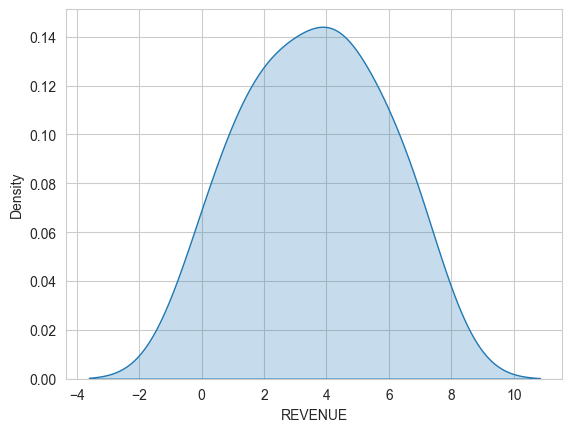

In [26]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.kdeplot(df.REVENUE, shade=True)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [ ]:
sim.res[0].all_kpi # All driver revenue 

# Strategy 2: 

# params.kpi = 2 (Pooled Ride - Nearest) 


In [25]:
params.kpi = 2

In [26]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate


30-03-23 13:08:28-WARNING-Setting up 1h simulation at 2023-03-30 12:16:49 for 20 vehicles and 500 passengers in Delft, Netherlands
0.5
30-03-23 13:08:30-CRITICAL-this is request 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] available rides.
30-03-23 13:08:30-CRITICAL-ride 0 available [1]
30-03-23 13:08:30-CRITICAL-ride 636 available [0, 1]
30-03-23 13:08:30-CRITICAL-ride 1256 available [1, 0]
30-03-23 13:08:30-CRITICAL-ride 1314 available [1, 0]
30-03-23 13:08:30-CRITICAL-ride 1490 available [1, 0]
30-03-23 13:08:30-CRITICAL-ride 2214 available [1, 0]
30-03-23 13:08:30-CRITICAL-ride 2253 available [1, 0]
30-03-23 13:08:30-CRITICAL-ride 2873 available [1, 0]
30-03-23 13:08:30-CRITICAL-ride 2989 available [1, 0]
30-03-23 13:08:30-CRITICAL-ride 5113 available [1, 0, 0]
30-03-23 13:08:30-CRITICAL-this is reuqest 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] still available rides.
Pooled rides
30-03-23 13:08:30-CRITICAL-vehicle 1 has 10 choices
0.5
30-03-

In [31]:
df = sim.res[0].veh_exp

In [32]:
df

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,12,0.0,False,0,0,40.0,15.0,0,543.0,0,...,0,0,7042.0,1429.0,0.0,1387.0,901.0,3325.0,36.066,3.4794
2,6,0.0,False,0,0,179.0,15.0,0,44.0,0,...,0,0,9418.0,645.0,0.0,318.0,239.0,8216.0,9.822,3.7800
3,17,0.0,False,0,0,155.0,23.0,0,309.0,0,...,0,0,6569.0,2323.0,0.0,910.0,842.0,2494.0,46.389,2.1300
4,8,0.0,False,0,0,64.0,15.0,0,135.0,0,...,0,0,8781.0,961.0,0.0,603.0,390.0,6827.0,20.089,2.5908
5,5,0.0,False,0,0,60.0,15.0,0,80.0,0,...,0,0,9600.0,632.0,0.0,262.0,245.0,8461.0,11.274,4.1652
6,5,0.0,False,0,0,67.0,16.0,0,100.0,0,...,0,0,9735.0,588.0,0.0,143.0,266.0,8738.0,5.898,2.1984
7,14,0.0,False,0,0,69.0,15.0,0,162.0,0,...,0,0,6904.0,1939.0,0.0,1290.0,597.0,3078.0,37.284,2.6592
8,8,0.0,False,0,0,63.0,15.0,0,83.0,0,...,0,0,8826.0,643.0,0.0,929.0,338.0,6916.0,20.052,2.9712
9,10,0.0,False,0,0,153.0,15.0,0,197.0,0,...,0,0,7579.0,1782.0,0.0,773.0,512.0,4512.0,38.784,4.3164


In [33]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PooledRide.csv')

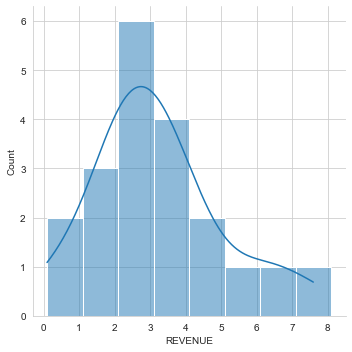

In [29]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [79]:
sim.res[0].veh_exp['REVENUE'].to_list()

[3.1992,
 11.745000000000001,
 4.8924,
 2.7504,
 2.4215999999999998,
 0.0,
 3.1488,
 0.9359999999999999,
 3.78,
 4.768800000000001,
 2.064,
 4.6548,
 6.0336,
 2.6736000000000004,
 4.6668,
 5.300099999999999,
 7.2696,
 4.628699999999999,
 0.564,
 3.5832]

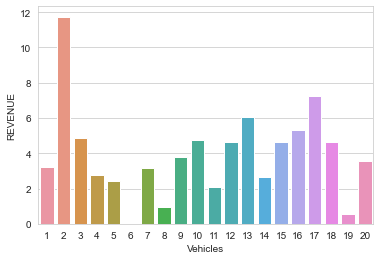

In [75]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [18]:
sim.res[0].all_kpi # All driver revenue 

18.246000000000002

# Strategy 3: 
# params.kpi = 3 (Private ride)


In [34]:
params.kpi = 3

In [35]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

30-03-23 13:12:59-WARNING-Setting up 1h simulation at 2023-03-30 12:16:49 for 20 vehicles and 500 passengers in Delft, Netherlands
0.5
30-03-23 13:13:01-CRITICAL-this is request 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] available rides.
30-03-23 13:13:01-CRITICAL-ride 0 available [1]
30-03-23 13:13:01-CRITICAL-ride 636 available [0, 1]
30-03-23 13:13:01-CRITICAL-ride 1256 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 1314 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 1490 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2214 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2253 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2873 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 2989 available [1, 0]
30-03-23 13:13:01-CRITICAL-ride 5113 available [1, 0, 0]
30-03-23 13:13:01-CRITICAL-this is reuqest 0 with [0, 636, 1256, 1314, 1490, 2214, 2253, 2873, 2989, 5113] still available rides.
private rides
30-03-23 13:13:01-CRITICAL-vehicle 1 has 10 choices
0.5
30-03

In [36]:
df = sim.res[0].veh_exp

In [37]:
df.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/PrivateRide.csv')

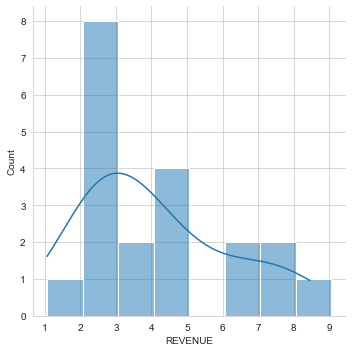

In [38]:
import seaborn as sns
sns.set_style("whitegrid")

df = sim.res[0].veh_exp

#sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

#ax = sns.histplot(df.REVENUE, kde=True, binwidth=1)


ax = sns.displot(df.REVENUE, kde=True, binwidth=1)


#ax =sns.histplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

In [88]:
sim.res[0].veh_exp['REVENUE'].to_list()

[3.1992,
 11.745000000000001,
 3.78,
 7.2696,
 2.064,
 0.0,
 2.4215999999999998,
 4.6548,
 4.6668,
 0.564,
 2.6736000000000004,
 2.7504,
 4.768800000000001,
 3.5832,
 0.9359999999999999,
 3.1488,
 6.0336,
 4.8924,
 5.300099999999999,
 4.628699999999999]

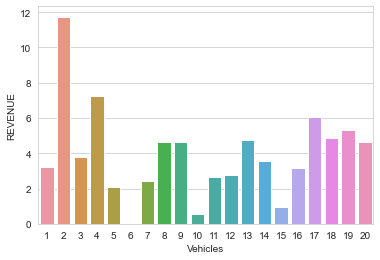

In [89]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [90]:
sim.res[0].all_kpi # All driver revenue 

79.08059999999999

# All in one Simulation  

In [25]:
responses = []
avg_kpi = []
idle_time = []

for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
    sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/veh{}.csv'.format(i))
    sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/pax{}.csv'.format(i))
    #driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)['Vehicles'] = sim.res[0].veh_exp.index
    #sim.res[0].veh_exp['ds'] = f"{i}"
    
    #responses.append(sim.res[0].veh_exp)
     
   # vehicles = sim.res[0].veh_exp.loc[sim.res[0].veh_exp["nRIDES"] > 0]
    #no_of_veh = len(vehicles)
    
    #avg_kpi.append(sim.res[0].all_kpi/no_of_veh)
    #idle_time.append(vehicles['IDLE'].sum()/no_of_veh)
    
    #_inData.sblts.rides['commission'] = _inData.sblts.rides.apply(lambda row: row.fare*sp.comm_rate, axis=1)
    

0.5
27-03-23 09:26:59-CRITICAL-this is request 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] available rides.
27-03-23 09:26:59-CRITICAL-ride 0 available [1]
27-03-23 09:26:59-CRITICAL-ride 902 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 2444 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 2559 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 3335 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 4457 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 6295 available [0, 1, 0]
27-03-23 09:26:59-CRITICAL-this is reuqest 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] still available rides.
Profit Maximization
27-03-23 09:26:59-CRITICAL-vehicle 1 has 7 choices
0.5
27-03-23 09:26:59-CRITICAL-this is request 1 with [1, 1262, 1263, 1319, 2986, 3542, 3566, 5009, 5010, 5891] available rides.
27-03-23 09:26:59-CRITICAL-ride 1 available [1]
27-03-23 09:26:59-CRITICAL-ride 1262 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 1263 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 1319 available [

# Performance Parameters for Driver

In [26]:
import pandas as pd
index = pd.Index(['Revenue', 'Profit', 'Cost', 'Idle Time'])
driver_data = pd.DataFrame({"Profit Maximization":[], "Pooled Ride": [], "Private Ride": []})
driver_data.loc['Revenue'] = avg_kpi
driver_data.loc['Idle Time'] = idle_time
driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)

ValueError: cannot set a row with mismatched columns

In [ ]:
driver_data

In [ ]:
csv_data = driver_data.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/nV20.csv')

In [ ]:
print('\nCSV String:\n', csv_data)